# Tässä erilaista qiskit kokeiluja

Täältä kopioitu: https://qiskit.org/textbook/preface.html

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.3',
 'qiskit-aer': '0.7.3',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.4'}

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

Otetaan backendiksi statevector simulaattori, joka suoritetaan lokaalisti. Tämä on idealisoitu täydellisesti toimiva kvanttikone, jossa mittauksiakin voi tehdä ilman vaikutusta.

Todellista vaknttikonetta simuloiva simulaattori olisi 'qasm_simulator'

In [3]:
backend = Aer.get_backend('statevector_simulator')

Luodaan yhden kubitin piiri, jossa kubitti alustetaan tiettyyn superpositioon. Piirretään piirin kuva.

Jos hluaa nätimpiä, niin katso kohta "1. Setting up default drawer to MatPlotLib" täältä:
https://qiskit.org/textbook/ch-prerequisites/setting-the-environment.html

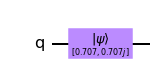

In [4]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [1/sqrt(2), 1j/sqrt(2)]
#initial_state = [1, 1]
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

Ajetaan piiri backendillä

In [5]:
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state[0])
print(out_state[1])
print(out_state) # Display the output state vector

(0.7071067811865475+0j)
0.7071067811865475j
[0.70710678+0.j         0.        +0.70710678j]


Tulokset. Tässä vaiheessa piirissä ei ole mittausta, joten kubitti ei ole kääntynyt 1 tai 0. Todellista konetta simuloivassa mallissa tällaista mittausta ei voisi edes tehdä. 

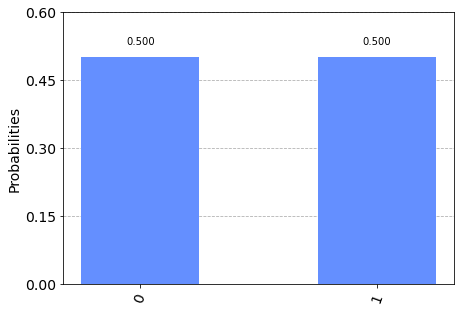

In [6]:
counts = result.get_counts()
plot_histogram(counts)

Lisätään piiriin mittari

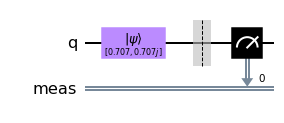

In [7]:
qc.measure_all()
qc.draw()

Tulokset. Nyt mittauksen jälkee superpositio romahtaa ja qubitti kääntyy sattumanvaraisesti joko 1 tai 0.

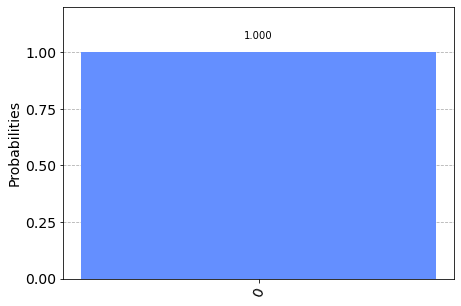

In [8]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

## yhden kubitin piiri jossa 0 todennäköisyys on 1/3

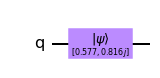

In [9]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [1/sqrt(3), 1j*sqrt(2)/sqrt(3)]
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

(0.5773502691896258+0j)
0.8164965809277261j


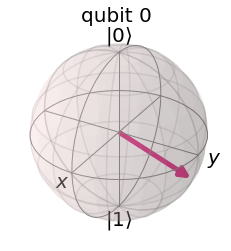

In [10]:
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state[0])
print(out_state[1])
plot_bloch_multivector(out_state)

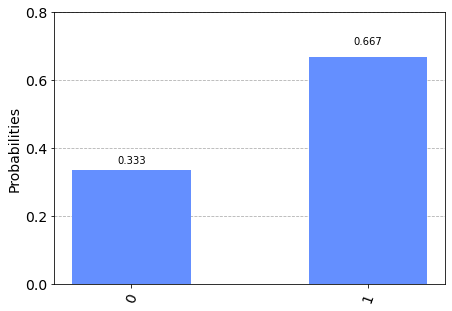

In [11]:
counts = result.get_counts()
plot_histogram(counts)

Toinen jossa identtinen tulos mutta eri superpositio. Eron huomaa bloch speeressä.

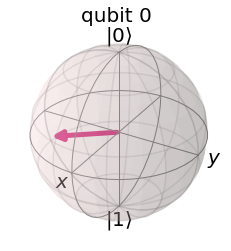

In [12]:
qc = QuantumCircuit(1)
initial_state = [1j/sqrt(3), sqrt(2)/sqrt(3)]
qc.initialize(initial_state, 0)
result = execute(qc,backend).result()
plot_bloch_multivector(result.get_statevector())

Ja graafi

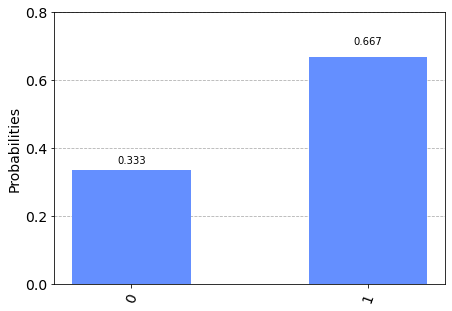

In [13]:
counts = result.get_counts()
plot_histogram(counts)

## Superpositio romahtaa kun mitataan

Ensin viritetään taas simppeli yhden kubitin piiri

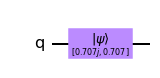

In [14]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

Vectori ei osoita ylös tai alas, joten se on superpositiossa

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


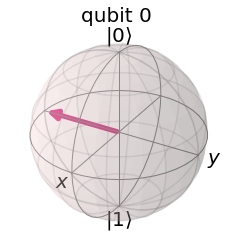

In [15]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))
plot_bloch_multivector(state)

Lisätään mittaus

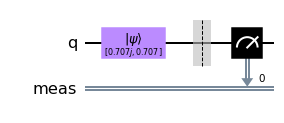

In [16]:
qc.measure_all()
qc.draw()

Ja superpositio romahtaa

State of Measured Qubit = [0.+1.j 0.+0.j]


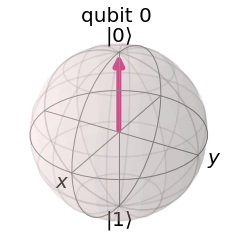

In [17]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))
plot_bloch_multivector(state)

## Lisätään oikeita portteja
X = pauli-x matriisi, Y = Pauli-y matriisi, Z = Pauli-z matriisi

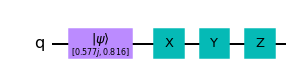

In [18]:
qc = QuantumCircuit(1)
initial_state = [1j/sqrt(3), sqrt(2)/sqrt(3)]
qc.initialize(initial_state, 0)
qc.x(0)
qc.y(0)
qc.z(0)
qc.draw()

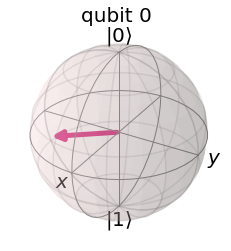

In [19]:
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

Tässä sama alkuasetelma ilman portteja

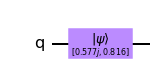

In [20]:
qc = QuantumCircuit(1)
initial_state = [1j/sqrt(3), sqrt(2)/sqrt(3)]
qc.initialize(initial_state, 0)
qc.draw()

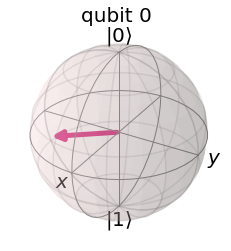

In [21]:
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

# Monta kubittia

Kahden kubitin piiri, jossa kaksi porttia H (Hadamard) ja CNOT. Huom: ei mittausta, joten superpositio säilyy.

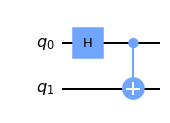

In [22]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.cx(0,1)
qc.draw()

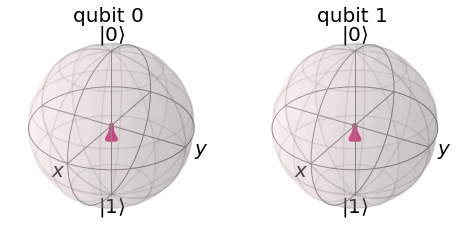

In [23]:
final_state = execute(qc,backend).result().get_statevector()

plot_bloch_multivector(final_state)

Tämä piiri virittää kubiti lomittuneeseen tilaan. Tarkoittaa sitä että kummallakin kubitilla on mitattaessa sama arvo, olkoot se 1 tai 0. Eli alla tilojen 10 ja 01 todennäköisyys 0.

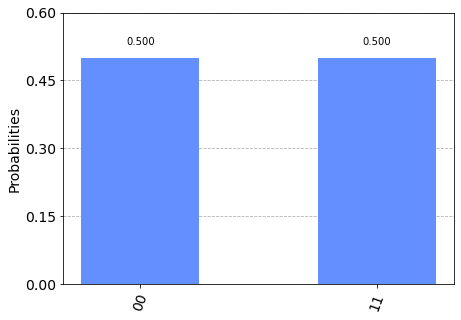

In [24]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

# Piirin ajaminen oikealla kvanttikoneella

Tähän tarvitaan IBM tunnukset. Kirjaudu täällä

https://quantum-computing.ibm.com/login

"my account" kohdasta löytyy API Token. Se pitää tallentaa enne ```load_Account()``` käskyä. Hoituu tällä:

```IBMQ.save_account('API Token')```

In [25]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, BasicAer, IBMQ
from qiskit.extensions import Initialize
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

/home/lauri/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Luodaan neljän kubitin kvanttipiiri ja lisätään siihen reippaasti portteja.

Algoritmi: Deutsch-Jozsa Algorithm

https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

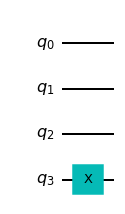

In [27]:
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

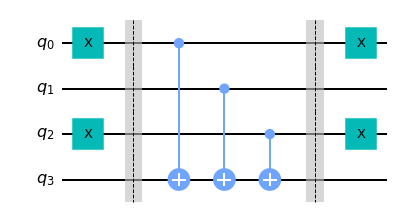

In [28]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

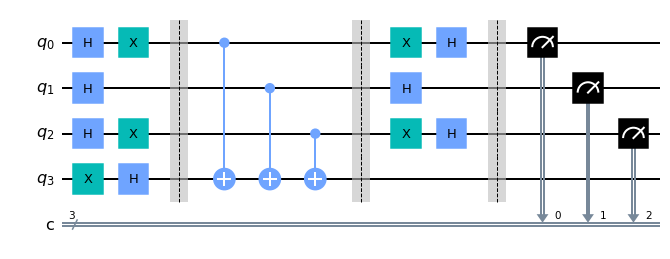

In [29]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

Mitä koneita on käytettävissä?

In [30]:
for x in provider.backends():
    if not x.configuration().simulator:
        print(x,'- qubitteja:',x.configuration().n_qubits,'- toiminnassa: ',x.status().operational)

ibmqx2 - qubitteja: 5 - toiminnassa:  True
ibmq_16_melbourne - qubitteja: 15 - toiminnassa:  True
ibmq_vigo - qubitteja: 5 - toiminnassa:  False
ibmq_ourense - qubitteja: 5 - toiminnassa:  False
ibmq_valencia - qubitteja: 5 - toiminnassa:  False
ibmq_armonk - qubitteja: 1 - toiminnassa:  True
ibmq_athens - qubitteja: 5 - toiminnassa:  True
ibmq_santiago - qubitteja: 5 - toiminnassa:  True


Valitaan kone jossa vähiten lastia

In [31]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_athens


suoritetaan ja seurataan jonotusta. Tässä saattaa mennä ihan reilustikin aikaa riippuen jonosta

In [37]:
shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


Täydellisellä koneella tulos olisi yhden tilan todennäköisyys 100%. Alla huomaa että pientä häriöitä vekottimissa vielä on... 

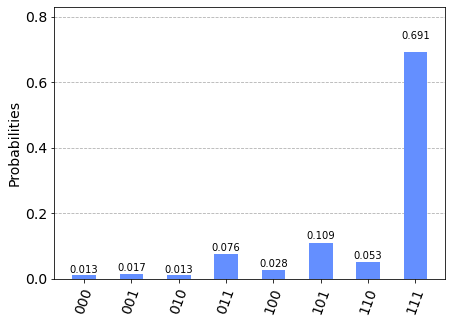

In [39]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)